### Import libraries

In [2]:
import pandas as pd
import numpy as np

from sklearn.metrics import f1_score, precision_score, recall_score

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = ['Helvetica'] + plt.rcParams['font.serif']
plt.rcParams['font.size'] = 14

### Read the data

In [3]:
submissions = pd.read_parquet('../../data/submissions.parquet')
t_manual = pd.read_parquet('../toxicity_manual_eval/t_manual_annotation.parquet')

### Choose a threshold to mark as "toxic"

In [4]:
human_decision = [*t_manual['decision']]
f1_prec_recall_count = []

for thresh in np.linspace(0, 1, 51):
    openai_decision = (t_manual['Max omni-moderation']>=thresh).apply(lambda x: 1 if x else 0)
    f1 = f1_score(human_decision, openai_decision)
    precision = precision_score(human_decision, openai_decision)
    recall = recall_score(human_decision, openai_decision)
    f1_prec_recall_count.append((thresh, f1, precision, recall))

/home/exouser/anaconda3/envs/prosocial/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


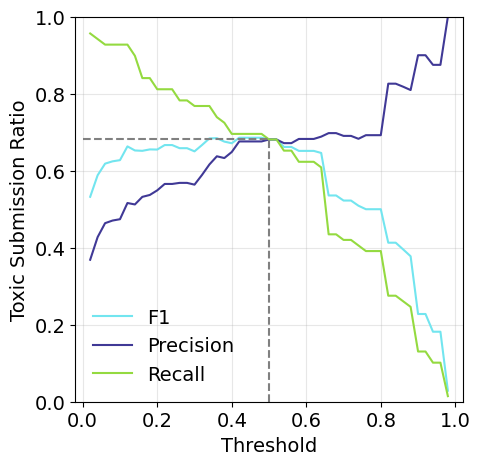

In [ ]:
fig, axs = plt.subplots(figsize=(5, 5), nrows=1, ncols=1)

for i in [0, 1, 2]:
    axs.plot([_[0] for _ in f1_prec_recall_count][1:-1],
                [_[i+1] for _ in f1_prec_recall_count][1:-1],
                label=['F1', 'Precision', 'Recall'][i],
                color=["#72e5ef", "#403996", "#94da40"][i])

axs.vlines(x=0.5, ymin=0, ymax=[i[1] for i in f1_prec_recall_count if i[0] ==.5], color='gray', linestyle='--')
axs.hlines(y=[i[1] for i in f1_prec_recall_count if i[0] ==.5], xmin=0, xmax=.5, color='gray', linestyle='--')
# axs.annotate('Threshold = 0.5', xy=(0.5, [i[1] for i in f1_prec_recall if i[0] ==.5][0]), xytext=(0.55, [i[1] for i in f1_prec_recall if i[0] ==.5][0]+.05),
#              arrowprops=dict(facecolor='black', linewidth=.01),)

axs.set_ylim(0, 1)
axs.legend(frameon=False)

axs.set_xlim(-0.02, 1.02)
axs.set_xlabel('Threshold')
axs.set_ylabel('Toxic Submission Ratio')
axs.grid(alpha=.3)

plt.subplots_adjust(wspace=0.3)

fig.savefig('../../figures/model_validations/f1_precision_recall.pdf', bbox_inches='tight')
fig.show()